# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,re
pd.options.display.max_columns = None
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.utils import resample
import matplotlib.colors as mcolors
COLORS = list(mcolors.TABLEAU_COLORS.values())

----

# Loading Data

In [2]:
df = pd.read_csv('american_mnc_retail_data.csv')

In [3]:
df.shape

(550068, 10)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


 - No nulls observed

In [6]:
#Converting some columns to object dtype
df[['User_ID','Occupation','Marital_Status','Product_Category']] = df[['User_ID','Occupation','Marital_Status','Product_Category']].astype(str)

### Non Visual EDA

In [7]:
display(df.describe())
print('----------')
display(df.describe(include='O'))
print('----------')
display(round(df['Gender'].value_counts(1)*100))
print('----------')

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


----------


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


----------


M    75.0
F    25.0
Name: Gender, dtype: float64

----------


- There is a difference of ~1200 between the Purchase Amount mean and median
- There are 5891 customers in the dataset. They have collectively bought 3631 different products which can be clubbed into 20 categories of Products. 
- The most common attributes of a customer making a transaction from the retail shop are : 
    - Male
    - Aged between 26 - 35
    - Occupation is 4
    - City Category is B
    - Staying in current city for 1 year
    - Unmarried
    - Product Category is 5
- 75% of transactions are made by male

### Visual EDA

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

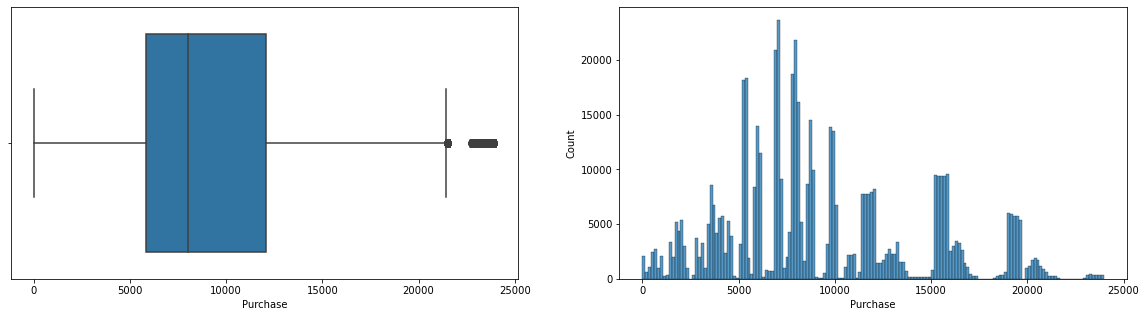

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(df['Purchase'],ax=ax[0])
sns.histplot(df['Purchase'],ax=ax[1])

- There seems to be some outlier products which are too expensive than the rest of the products.
- Products also seemed to be priced in different buckets

In [9]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


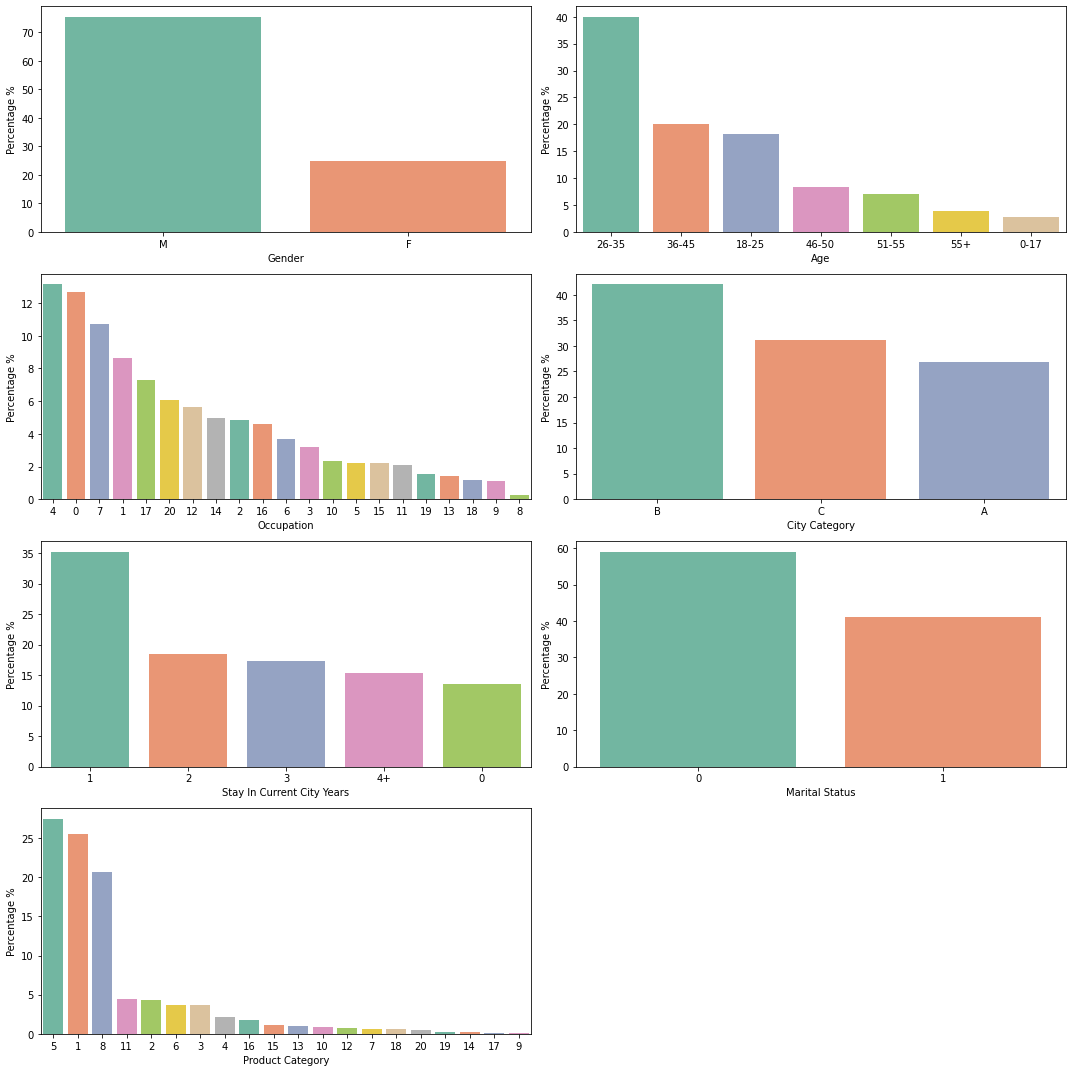

In [10]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['figure.autolayout'] = True
for e,col in enumerate(['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']):
    ax = plt.subplot(4,2,e+1)
    perc_col = df[col].value_counts(1)*100
    sns.barplot(x=perc_col.index, y=perc_col.values, ax=ax, palette='Set2')
    ax.set_ylabel('Percentage %')
    ax.set_xlabel(col.replace('_',' '))

- Based on the visuals above we can clearly infer the following : 
    - There are much more transactions by Male customers (75%) than Female (25%)
    - Most of the transactions are made by the 26-35 Age group (40%)
    - Most of the transactions are made by customers having Occupation code 4 (13%)
    - Most number of transactions are made in City Category B (40%)
    - Most of the transactions are made by customers staying in city for 1 year only (35%)
    - 60% of transactions are made by Unmarried Customers
    - Most popular product categories are : 5 (27%), 1 (25%), 8 (20%)

----

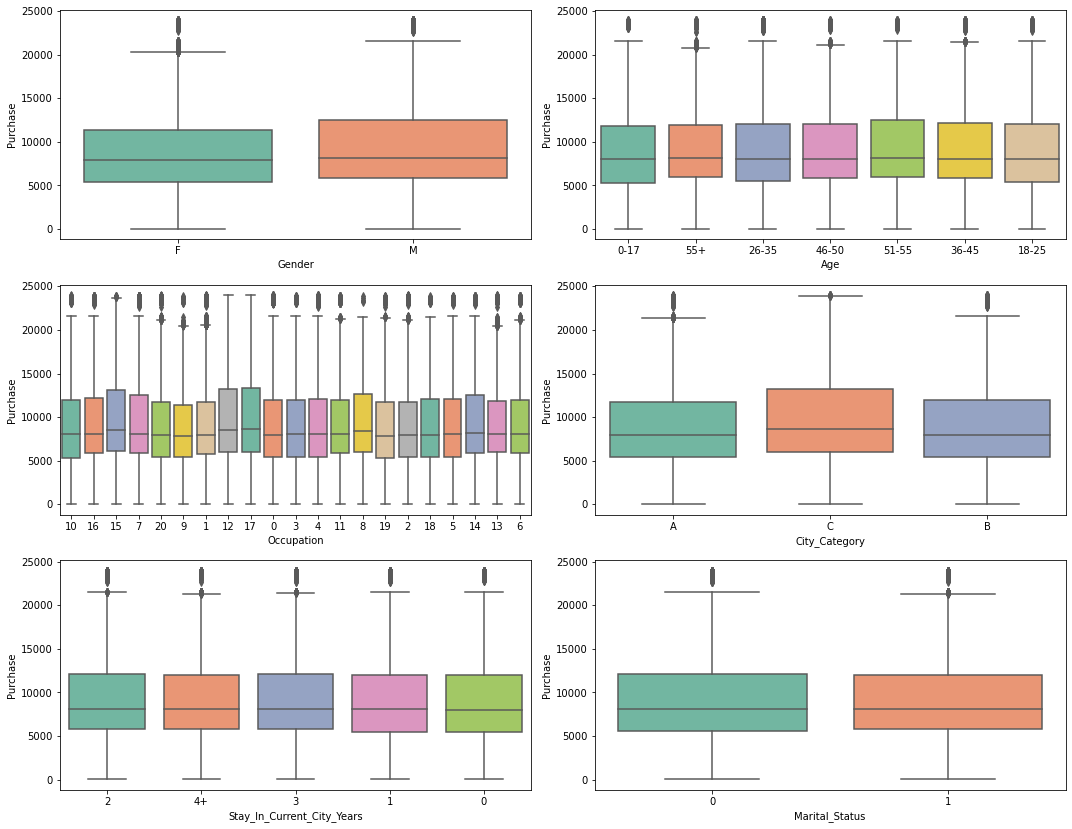

In [11]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['figure.autolayout'] = True
for e,col in enumerate(['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']):
    ax = plt.subplot(4,2,e+1)
    sns.boxplot(x=col, y='Purchase', data=df, ax=ax, palette='Set2')

- Based on the above visuals we can say on a transactional basis (not grouped on user level): 
    - Purchases made by Male Customers are slightly higher than Females
    - Purchases made by customers having occupation code as 12,17,15 are slightly higher than others
    - Purchases made in City Category C are slight higher than other two city categories
    - There is not much difference in spending on the basis of Age, Stay in Current City and Marital Status
- NOTE : These are general trends we see in the boxplots. We cannot directly infer these statements about the entire population. We need to analyze the mean of different samples and look at the confidence intervals to make more robust claims

<AxesSubplot:>

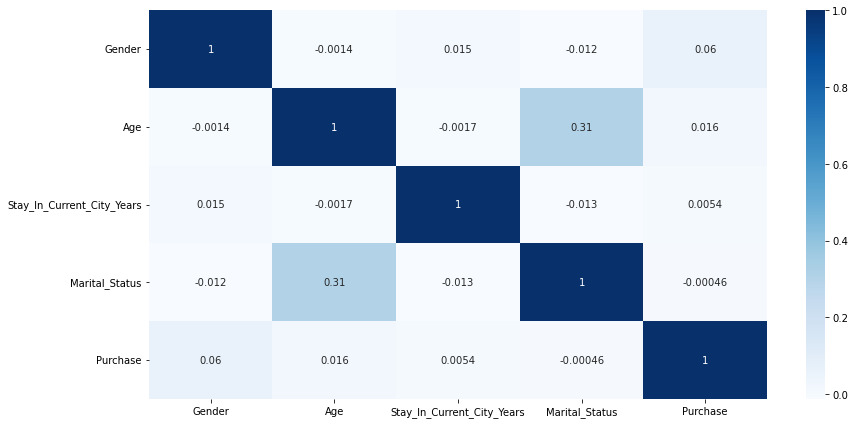

In [12]:
plt.rcParams['figure.figsize'] = (13,6)
plt.rcParams['figure.autolayout'] = True
df_copy = df.copy()
df_copy['Gender'] = df_copy['Gender'].replace({'M':1,'F':0}).astype(int)
df_copy['Age'] = df_copy['Age'].replace({'0-17' : (0+17)/2,
                                         '55+' : (55+80)/2,
                                         '26-35' : (26+35)/2,
                                         '46-50' : (46+50)/2,
                                         '51-55' : (51+55)/2,
                                         '36-45' : (36+45)/2,
                                         '18-25' : (18+25)/2}
                                       ).astype(float)
df_copy['Stay_In_Current_City_Years'] = df_copy['Stay_In_Current_City_Years'].replace({'4+':4}).astype(int)
df_copy['Marital_Status'] = df_copy['Marital_Status'].astype(int)
sns.heatmap(df_copy[['Gender','Age','Stay_In_Current_City_Years','Marital_Status','Purchase']].corr(),annot=True,cmap='Blues')

- Purchase doesn't show any strong correlation with any measure (highest is 0.06 with Gender) 
- Age and Marital Status are somewhat correlated (0.31)

---

# Inferential Statistics on Spending patterns across gender, age and marital status

### First lets group the transactions for each user and then do further analysis

In [13]:
df_at_user_level = pd.DataFrame(df.groupby('User_ID')['Purchase'].sum())

In [14]:
# We also need to check if the gender, age and marital status of each user is constant throughout
(df.groupby('User_ID')['Gender','Age','Marital_Status'].nunique() == 1).all()

Gender            True
Age               True
Marital_Status    True
dtype: bool

In [15]:
tmp = df.groupby('User_ID')['Gender','Age','Marital_Status'].first()

In [16]:
# Merging few age buckets for easier caluclations
tmp['Age'] = tmp['Age'].replace({'36-45':'36-50',
                                 '46-50':'36-50',
                                 '51-55':'51+',
                                 '55+':'51+'})

In [17]:
df_at_user_level = df_at_user_level.merge(tmp, left_index=True, right_index=True).reset_index()

In [18]:
df_at_user_level.shape

(5891, 5)

In [21]:
df_at_user_level.head()

,User_ID,Purchase,Gender,Age,Marital_Status
0,1000001,334093,F,0-17,0
1,1000002,810472,M,51+,0
2,1000003,341635,M,26-35,0
3,1000004,206468,M,36-50,1
4,1000005,821001,M,26-35,1


Median --> 521213
Mean   --> 865017 
----------------



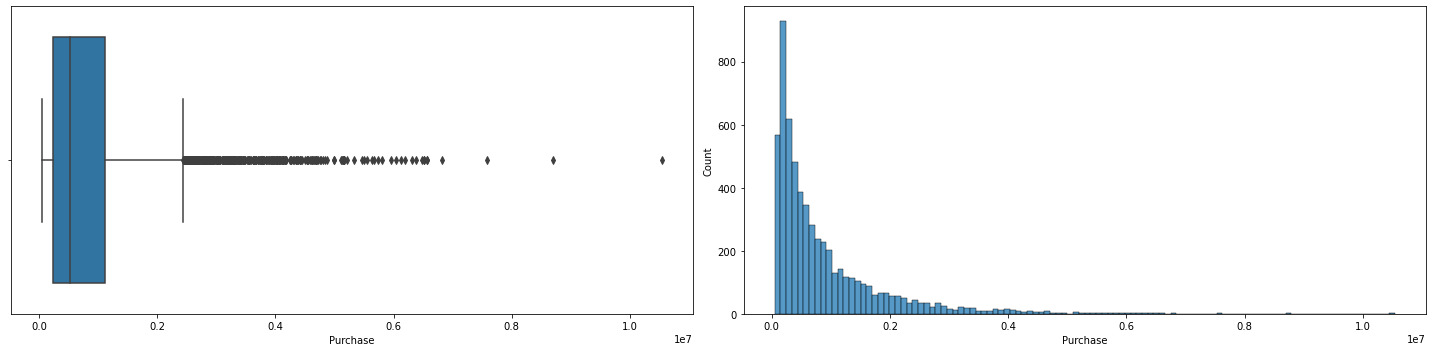

In [22]:
print('Median -->',round(df_at_user_level['Purchase'].median()))
print('Mean   -->',round(df_at_user_level['Purchase'].mean()),'\n----------------')
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(df_at_user_level['Purchase'],ax=ax[0])
sns.histplot(df_at_user_level['Purchase'],ax=ax[1])
print()

- From the above graph we can say : 
     - There is a big difference between median and mean purchase amount signalling outliers
     - There are many outlier customers who are purchasing way more on Black Friday as compared to the rest
     - The nature of graph resembles income distribution in the world (most people are poor, handful are extremely rich)

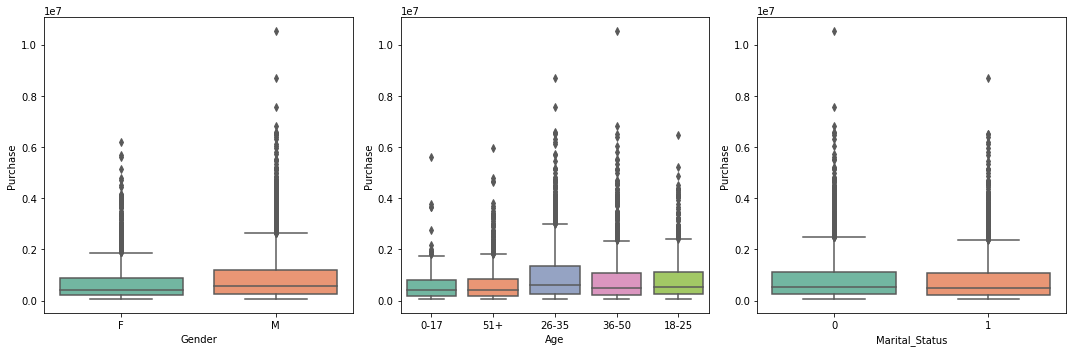

In [23]:
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.autolayout'] = True
for e,col in enumerate(['Gender','Age','Marital_Status']):
    ax = plt.subplot(1,3,e+1)
    sns.boxplot(x=col, y='Purchase', data=df_at_user_level, ax=ax, palette='Set2')

- Based on the above visuals we can say that on a user level : 
    - Male seem to be making higher purchases than female
    - 26-35 Age bracket seem to be making highest purchases across all brackets
    - Unmarried customers seem to be making higher purchases than married ones
    
- Lets verify our inferences for the entire population using the concept of CLT and confidence intervals

----

In [24]:
def infer_population_using_sample(df_, column_to_split_on, n_samples=50 , n_repeats=100, viz=True):
    df = df_.copy() # Making copy of data
    segregated_data = {} # Creating a dictionary to store dataframes for each type in column
    mean_of_samples = {} # Creating a dictionary to store mean of samples for each type in the column
    for i in df[column_to_split_on].unique(): 
        segregated_data[i] = df[df[column_to_split_on] == i]
        mean_of_samples[i] = []
    
    for k,v in segregated_data.items():
        for n in range(n_repeats): #number of times to draw the samples
            mu = resample(v['Purchase'], n_samples=n_samples, random_state=n).mean() #defininng random state so that data is reproducible
            mean_of_samples[k].append(mu)
     
    #Reporting
    if viz:
        print('---x---'*15)
        print(f'\nSample Size : {n_samples} | Number of sample draws : {n_repeats}\n')
        fig, ax = plt.subplots(1,1,figsize=(10,4))
        for e,(k,v) in enumerate(mean_of_samples.items()):
            print(f'\n{column_to_split_on} category {k} : ')
            print(f'\tSample Mean : {round(np.mean(v),1)}')
            print(f'\tSample Std : {round(np.std(v),1)}')
            print(f'\t90% CI : {round(np.mean(v) - 1.64*np.std(v),1)} to {round(np.mean(v) + 1.64*np.std(v),1)}')
            print(f'\t95% CI : {round(np.mean(v) - 1.96*np.std(v),1)} to {round(np.mean(v) + 1.96*np.std(v),1)}')
            print(f'\t99% CI : {round(np.mean(v) - 2.58*np.std(v),1)} to {round(np.mean(v) + 2.58*np.std(v),1)}')
            sns.histplot(v, ax=ax, color=COLORS[e], label=k, kde=True)
        ax.legend()
        plt.show()
    return mean_of_samples

## Gender Inference

---x------x------x------x------x------x------x------x------x------x------x------x------x------x------x---

Sample Size : 50 | Number of sample draws : 1000


Gender category F : 
	Sample Mean : 711892.7
	Sample Std : 113790.6
	90% CI : 525276.1 to 898509.3
	95% CI : 488863.1 to 934922.3
	99% CI : 418312.9 to 1005472.5

Gender category M : 
	Sample Mean : 927638.2
	Sample Std : 141453.1
	90% CI : 695655.1 to 1159621.2
	95% CI : 650390.1 to 1204886.2
	99% CI : 562689.2 to 1292587.1


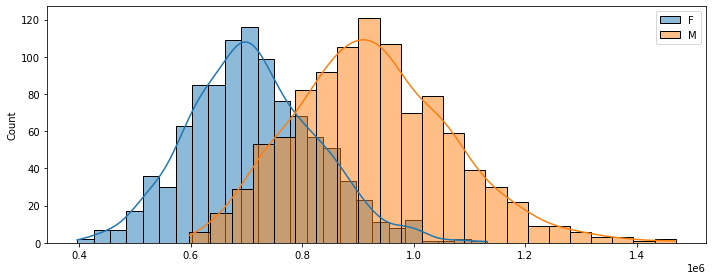

---x------x------x------x------x------x------x------x------x------x------x------x------x------x------x---

Sample Size : 100 | Number of sample draws : 1000


Gender category F : 
	Sample Mean : 709923.8
	Sample Std : 80086.2
	90% CI : 578582.4 to 841265.2
	95% CI : 552954.8 to 866892.8
	99% CI : 503301.4 to 916546.3

Gender category M : 
	Sample Mean : 932213.9
	Sample Std : 105472.0
	90% CI : 759239.8 to 1105187.9
	95% CI : 725488.7 to 1138939.0
	99% CI : 660096.1 to 1204331.6


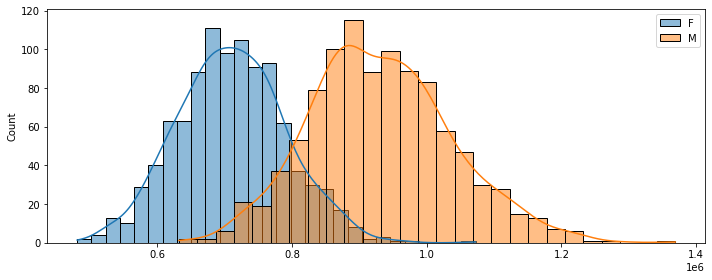

---x------x------x------x------x------x------x------x------x------x------x------x------x------x------x---

Sample Size : 150 | Number of sample draws : 1000


Gender category F : 
	Sample Mean : 708682.3
	Sample Std : 66024.5
	90% CI : 600402.1 to 816962.4
	95% CI : 579274.3 to 838090.3
	99% CI : 538339.1 to 879025.5

Gender category M : 
	Sample Mean : 931501.0
	Sample Std : 84275.4
	90% CI : 793289.4 to 1069712.7
	95% CI : 766321.3 to 1096680.8
	99% CI : 714070.6 to 1148931.5


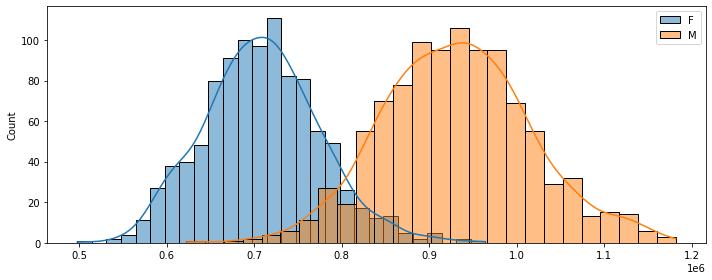

In [25]:
for n_samples in [50, 100, 150]:
    x = infer_population_using_sample(df_at_user_level, 'Gender', n_samples, n_repeats=1000)

## Marital Status Inference

---x------x------x------x------x------x------x------x------x------x------x------x------x------x------x---

Sample Size : 50 | Number of sample draws : 1000


Marital_Status category 0 : 
	Sample Mean : 874949.1
	Sample Std : 131896.9
	90% CI : 658638.2 to 1091260.0
	95% CI : 616431.2 to 1133467.0
	99% CI : 534655.2 to 1215243.1

Marital_Status category 1 : 
	Sample Mean : 834881.1
	Sample Std : 125866.1
	90% CI : 628460.6 to 1041301.6
	95% CI : 588183.5 to 1081578.7
	99% CI : 510146.5 to 1159615.7


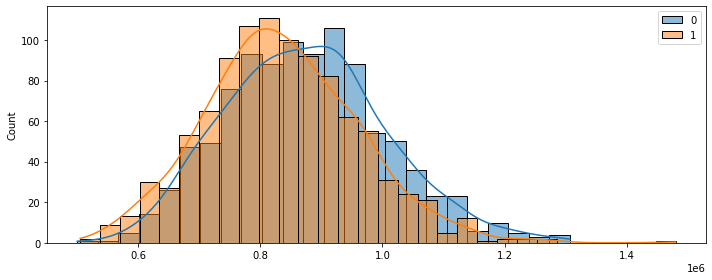

---x------x------x------x------x------x------x------x------x------x------x------x------x------x------x---

Sample Size : 100 | Number of sample draws : 1000


Marital_Status category 0 : 
	Sample Mean : 879090.2
	Sample Std : 90632.6
	90% CI : 730452.7 to 1027727.7
	95% CI : 701450.3 to 1056730.2
	99% CI : 645258.1 to 1112922.4

Marital_Status category 1 : 
	Sample Mean : 835862.3
	Sample Std : 91274.8
	90% CI : 686171.7 to 985552.9
	95% CI : 656963.8 to 1014760.9
	99% CI : 600373.4 to 1071351.2


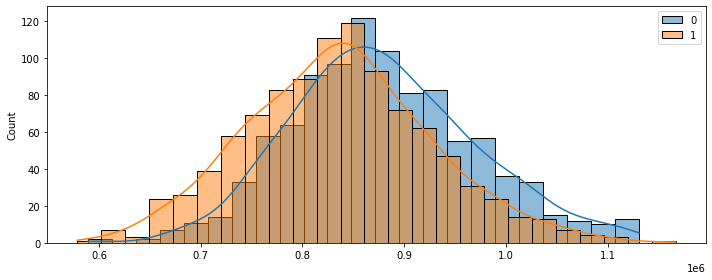

---x------x------x------x------x------x------x------x------x------x------x------x------x------x------x---

Sample Size : 150 | Number of sample draws : 1000


Marital_Status category 0 : 
	Sample Mean : 877786.6
	Sample Std : 72646.1
	90% CI : 758647.0 to 996926.2
	95% CI : 735400.3 to 1020173.0
	99% CI : 690359.7 to 1065213.6

Marital_Status category 1 : 
	Sample Mean : 840765.9
	Sample Std : 74297.0
	90% CI : 718918.8 to 962613.0
	95% CI : 695143.8 to 986388.1
	99% CI : 649079.6 to 1032452.2


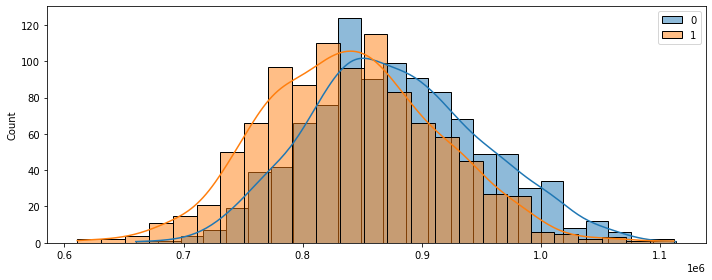

In [26]:
for n_samples in [50, 100, 150]:
    x = infer_population_using_sample(df_at_user_level, 'Marital_Status', n_samples, n_repeats=1000)

## Age Inference

---x------x------x------x------x------x------x------x------x------x------x------x------x------x------x---

Sample Size : 50 | Number of sample draws : 1000


Age category 0-17 : 
	Sample Mean : 618561.4
	Sample Std : 96506.1
	90% CI : 460291.3 to 776831.5
	95% CI : 429409.4 to 807713.5
	99% CI : 369575.6 to 867547.3

Age category 51+ : 
	Sample Mean : 662067.1
	Sample Std : 102667.3
	90% CI : 493692.8 to 830441.4
	95% CI : 460839.3 to 863295.0
	99% CI : 397185.6 to 926948.7

Age category 26-35 : 
	Sample Mean : 988705.7
	Sample Std : 148165.9
	90% CI : 745713.7 to 1231697.7
	95% CI : 698300.6 to 1279110.8
	99% CI : 606437.7 to 1370973.7

Age category 36-50 : 
	Sample Mean : 858237.5
	Sample Std : 135971.7
	90% CI : 635244.0 to 1081231.1
	95% CI : 591733.1 to 1124742.0
	99% CI : 507430.7 to 1209044.4

Age category 18-25 : 
	Sample Mean : 856724.5
	Sample Std : 124860.2
	90% CI : 651953.8 to 1061495.2
	95% CI : 611998.5 to 1101450.5
	99% CI : 534585.2 to 1178863.8


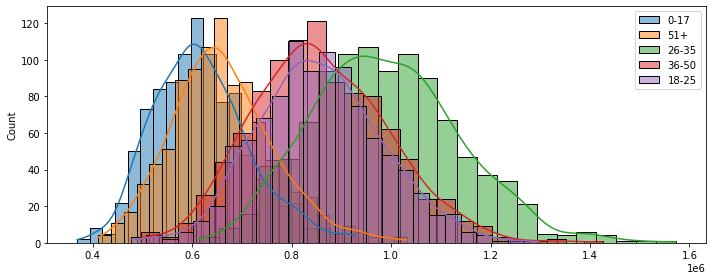

---x------x------x------x------x------x------x------x------x------x------x------x------x------x------x---

Sample Size : 100 | Number of sample draws : 1000


Age category 0-17 : 
	Sample Mean : 618760.8
	Sample Std : 68015.6
	90% CI : 507215.2 to 730306.4
	95% CI : 485450.2 to 752071.4
	99% CI : 443280.6 to 794241.1

Age category 51+ : 
	Sample Mean : 664048.0
	Sample Std : 71195.4
	90% CI : 547287.6 to 780808.5
	95% CI : 524505.0 to 803591.0
	99% CI : 480363.9 to 847732.2

Age category 26-35 : 
	Sample Mean : 988374.8
	Sample Std : 103005.3
	90% CI : 819446.1 to 1157303.6
	95% CI : 786484.4 to 1190265.3
	99% CI : 722621.1 to 1254128.6

Age category 36-50 : 
	Sample Mean : 854891.0
	Sample Std : 98013.7
	90% CI : 694148.5 to 1015633.4
	95% CI : 662784.1 to 1046997.8
	99% CI : 602015.6 to 1107766.3

Age category 18-25 : 
	Sample Mean : 856770.1
	Sample Std : 90866.7
	90% CI : 707748.7 to 1005791.6
	95% CI : 678671.4 to 1034868.9
	99% CI : 622334.0 to 1091206.3


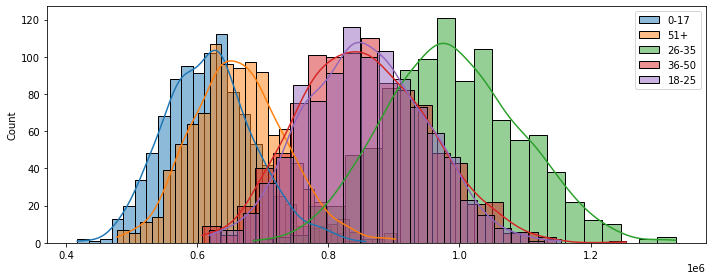

---x------x------x------x------x------x------x------x------x------x------x------x------x------x------x---

Sample Size : 150 | Number of sample draws : 1000


Age category 0-17 : 
	Sample Mean : 619271.4
	Sample Std : 56888.4
	90% CI : 525974.3 to 712568.4
	95% CI : 507770.0 to 730772.7
	99% CI : 472499.2 to 766043.5

Age category 51+ : 
	Sample Mean : 664564.8
	Sample Std : 59424.9
	90% CI : 567108.0 to 762021.6
	95% CI : 548092.0 to 781037.5
	99% CI : 511248.6 to 817881.0

Age category 26-35 : 
	Sample Mean : 987431.0
	Sample Std : 82791.7
	90% CI : 851652.6 to 1123209.3
	95% CI : 825159.3 to 1149702.7
	99% CI : 773828.4 to 1201033.5

Age category 36-50 : 
	Sample Mean : 855534.3
	Sample Std : 80011.9
	90% CI : 724314.9 to 986753.8
	95% CI : 698711.1 to 1012357.6
	99% CI : 649103.7 to 1061964.9

Age category 18-25 : 
	Sample Mean : 855278.2
	Sample Std : 74670.7
	90% CI : 732818.2 to 977738.1
	95% CI : 708923.6 to 1001632.8
	99% CI : 662627.7 to 1047928.6


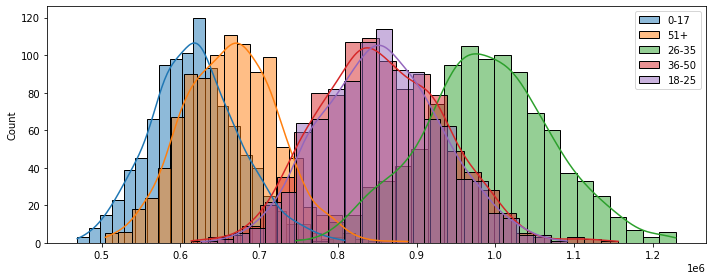

In [27]:
for n_samples in [50, 100, 150]:
    x = infer_population_using_sample(df_at_user_level, 'Age', n_samples, n_repeats=1000)